<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/udacity/Udacity_Training_09%5D_Saving_and_Loading_(Inception)_Rock%2C_Paper%2C_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, metadata = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)
(train_dataset, val_dataset) = dataset['train'], dataset['test']

n_train_count = len(train_dataset)
n_val_count = len(val_dataset)
class_names = metadata.features['label'].names
n_classes = len(class_names)

In [ ]:
print("Train dataset count:", n_train_count)
print("Validation dataset count:", n_val_count)
print("Classes:", class_names)

Train dataset count: 2520
Validation dataset count: 372
Classes: ['rock', 'paper', 'scissors']


In [ ]:
batch_size = 32
target_image_size = (150,150)

def normalize(image, label):
  image = tf.image.resize(image, target_image_size)
  image /= 255.
  return image, label


train_df = train_dataset.cache().map(normalize).shuffle(n_train_count//4).batch(batch_size)
val_df = val_dataset.cache().map(normalize).batch(batch_size)

In [ ]:
model_url = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'
feature_extractor = hub.KerasLayer(model_url, 
                                   input_shape=(150,150,3),
                                   trainable=False)

In [ ]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', 
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 3)                 6147      
Total params: 21,808,931
Trainable params: 6,147
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
epochs=50
history = model.fit(train_df, epochs=epochs, validation_data=val_df)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


79/79 [==============================] - 18s 119ms/step - loss: 0.2204 - accuracy: 0.9294 - val_loss: 0.4612 - val_accuracy: 0.7366
Epoch 2/50
79/79 [==============================] - 4s 50ms/step - loss: 0.0339 - accuracy: 0.9968 - val_loss: 0.4816 - val_accuracy: 0.7285
Epoch 3/50
79/79 [==============================] - 4s 49ms/step - loss: 0.0182 - accuracy: 0.9988 - val_loss: 0.4733 - val_accuracy: 0.7473
Epoch 4/50
79/79 [==============================] - 4s 50ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 0.4253 - val_accuracy: 0.7608
Epoch 5/50
79/79 [==============================] - 4s 49ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.5143 - val_accuracy: 0.7258
Epoch 6/50
79/79 [==============================] - 4s 50ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.4491 - val_accuracy: 0.7554
Epoch 7/50
79/79 [==============================] - 4s 50ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4628 - val_accuracy: 0.7527
Epoch 8/50
79/79 [====

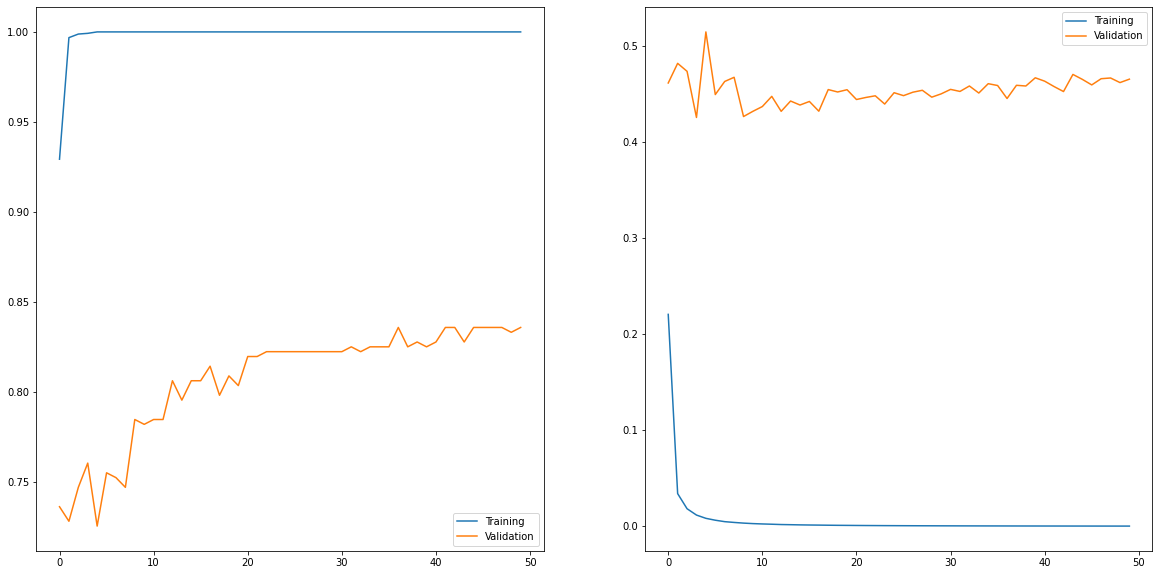

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['accuracy'], label='Training')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['loss'], label='Training')
plt.plot(history.epoch, history.history['val_loss'], label='Validation')
plt.legend()

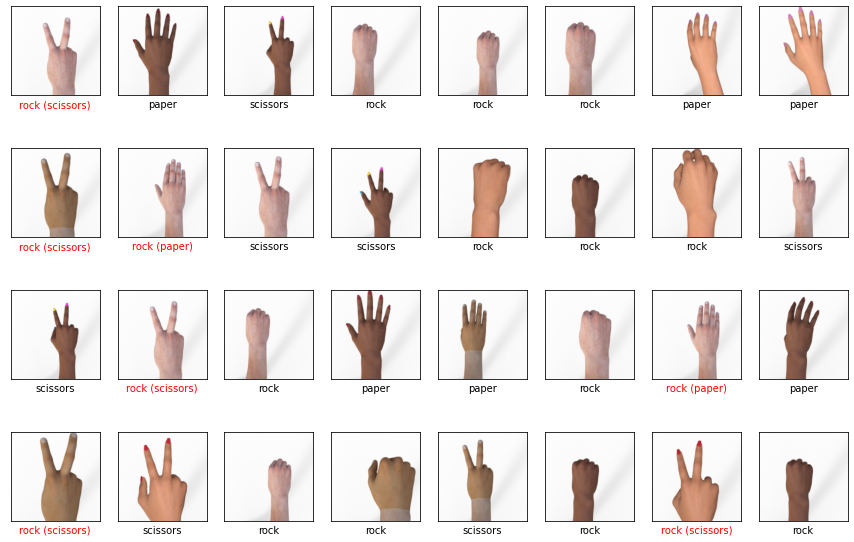

In [ ]:
images, label_ids = next(iter(val_df))

outputs = model.predict(images)
predictions = [class_names[np.argmax(probs)] for probs in outputs]

labels = [class_names[label_id] for label_id in label_ids]

plt.figure(figsize=(15,10))
for index,(image, correct_label, prediction) in enumerate(zip(images, labels, predictions)):
  text = correct_label if correct_label == prediction else f"{prediction} ({correct_label})"
  color = ("black" if correct_label == prediction else "red")

  plt.subplot(4, 8, index+1)
  plt.imshow(image)
  plt.xlabel(text, color=color)

  plt.xticks([])
  plt.yticks([])

In [ ]:
model.save("inception-model.h5")

In [ ]:
import tensorflow_hub
reloaded_model = tf.keras.models.load_model("inception-model.h5",
                                            custom_objects={
                                                'KerasLayer': tensorflow_hub.KerasLayer
                                            })

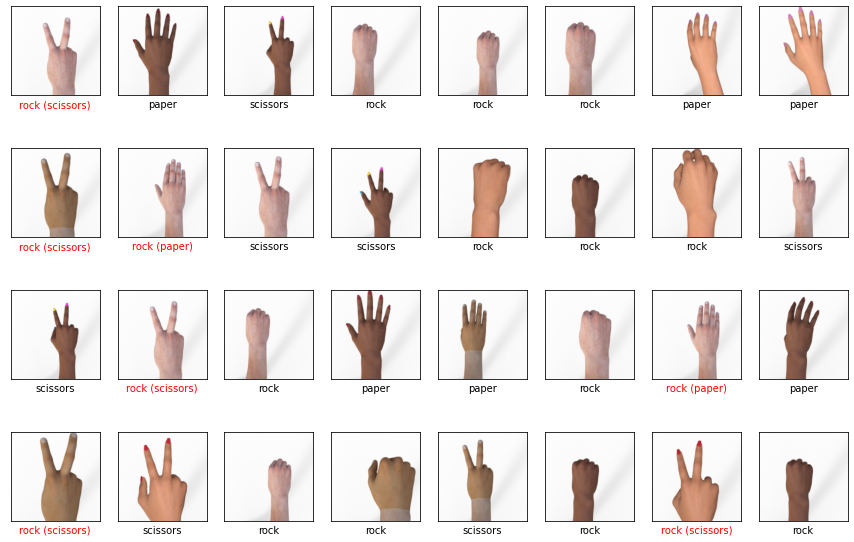

In [ ]:
images, label_ids = next(iter(val_df))

outputs = reloaded_model.predict(images)
predictions = [class_names[np.argmax(probs)] for probs in outputs]

labels = [class_names[label_id] for label_id in label_ids]

plt.figure(figsize=(15,10))
for index,(image, correct_label, prediction) in enumerate(zip(images, labels, predictions)):
  text = correct_label if correct_label == prediction else f"{prediction} ({correct_label})"
  color = ("black" if correct_label == prediction else "red")

  plt.subplot(4, 8, index+1)
  plt.imshow(image)
  plt.xlabel(text, color=color)

  plt.xticks([])
  plt.yticks([])